## HW3 - Andrew Logue

## Exploratory Data Analysis

In [1]:
# 1. Read in the data set and perform preliminary checks

# import libraries as needed
import pandas as pd 

# how many samples do we have?
# 569

# how many features do we have?
# 10

# what are the classes 
# M (357) or B (212), malignant or Benign

# how many classes do we have?
# 2

# how many samples of each class? are they balanced?
# M (357) and B (212) -- NOT BALANCED

# read the dataset
df = pd.read_csv("cancer.csv")
print(df)

classes = pd.unique(df['diagnosis'])
num_classes = len(classes)
each_class = df['diagnosis'].value_counts()

print(classes)
print(num_classes)
print(each_class)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [2]:
print(df.info())

# what are the names of the features
# radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean
# compactness_mean, concavity_mean, concave points_mean, symmetry_mean,
# fractal_dimension_mean

# what are the types of fetures?
# They are all numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB
None


In [3]:
# change categorical values of variety to numeric values
# NOT NECESSARY

# from sklearn.preprocessing import LabelEncoder 
# labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
# df['diagnosis'] = labelencoder.fit_transform(df['diagnosis']) #fitting and transforming the desired categorical column.

# print(df['diagnosis'].unique())

# df

In [4]:
# 2. Check missing values, outliers and statistics

# are there any missing values?
# No

# if so, what are you going to do about the missing values?
# N/A

df.isna().apply(pd.value_counts)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
False  569        569          569           569             569        569   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
False              569               569             569                  569   

       symmetry_mean  fractal_dimension_mean  
False            569                     569

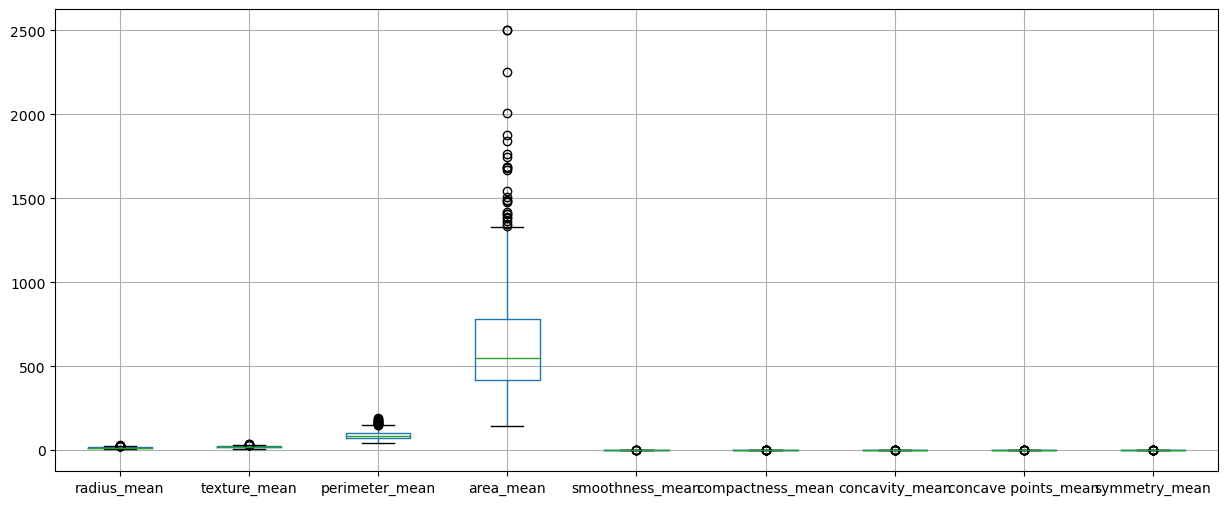

count          mean           std         min  \
id                      569.0  3.037183e+07  1.250206e+08  8670.00000   
radius_mean             569.0  1.412729e+01  3.524049e+00     6.98100   
texture_mean            569.0  1.928965e+01  4.301036e+00     9.71000   
perimeter_mean          569.0  9.196903e+01  2.429898e+01    43.79000   
area_mean               569.0  6.548891e+02  3.519141e+02   143.50000   
smoothness_mean         569.0  9.636028e-02  1.406413e-02     0.05263   
compactness_mean        569.0  1.043410e-01  5.281276e-02     0.01938   
concavity_mean          569.0  8.879932e-02  7.971981e-02     0.00000   
concave points_mean     569.0  4.891915e-02  3.880284e-02     0.00000   
symmetry_mean           569.0  1.811619e-01  2.741428e-02     0.10600   
fractal_dimension_mean  569.0  6.279761e-02  7.060363e-03     0.04996   

                                 25%           50%           75%           max  
id                      869218.00000  906024.00000  8.813129e+06  9.113205e+08  
radius_mean                 11.70000      13.37000  1.578000e+01  2.811000e+01  
texture_mean                16.17000      18.84000  2.180000e+01  3.928000e+01  
perimeter_mean              75.17000      86.24000  1.041000e+02  1.885000e+02  
area_mean                  420.30000     551.10000  7.827000e+02  2.501000e+03  
smoothness_mean              0.08637       0.09587  1.053000e-01  1.634000e-01  
compactness_mean             0.06492       0.09263  1.304000e-01  3.454000e-01  
concavity_mean               0.02956       0.06154  1.307000e-01  4.268000e-01  
concave points_mean          0.02031       0.03350  7.400000e-02  2.012000e-01  
symmetry_mean                0.16190       0.17920  1.957000e-01  3.040000e-01  
fractal_dimension_mean       0.05770       0.06154  6.612000e-02  9.744000e-02

In [5]:
from matplotlib import pyplot as plt

# are there outliers?
# Yes
# if so, what are you going to do about the outliers
# remove them

df.iloc[:, 2:11].boxplot(figsize = (15,6))

#plt.savefig('plots/i0.png')
plt.show()
df.describe().T

In [6]:
#IQR is the interquartile range

Q1 = df.iloc[:, 2:11].quantile(0.25)
Q3 = df.iloc[:, 2:11].quantile(0.75)
IQR = Q3 - Q1

# let's see how many outliers are in every column
df2 = ((df.iloc[:, 2:11] < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((df.iloc[:, 2:11] > (Q3 + 1.5 * IQR)).sum())
print(df2)
print(df3)
#print(df.iloc[:, 2:11].columns.tolist())

radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        1
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          1
dtype: int64
radius_mean            14
texture_mean            7
perimeter_mean         13
area_mean              25
smoothness_mean         5
compactness_mean       16
concavity_mean         18
concave points_mean    10
symmetry_mean          14
dtype: int64


In [7]:
# Remove outliers
for col in df.iloc[:, 2:11].columns:
    df.loc[(df[col] < (Q1[col] - 1.5 * IQR[col] )), col] = (Q1[col]  - 1.5 * IQR[col] )
    df.loc[(df[col] > (Q3[col]  + 1.5 * IQR[col] )), col] = (Q3[col]  + 1.5 * IQR[col] )
    
df2 = ((df.iloc[:, 2:11] < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((df.iloc[:, 2:11] > (Q3 + 1.5 * IQR)).sum())
print(df2)
print(df3)

radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64


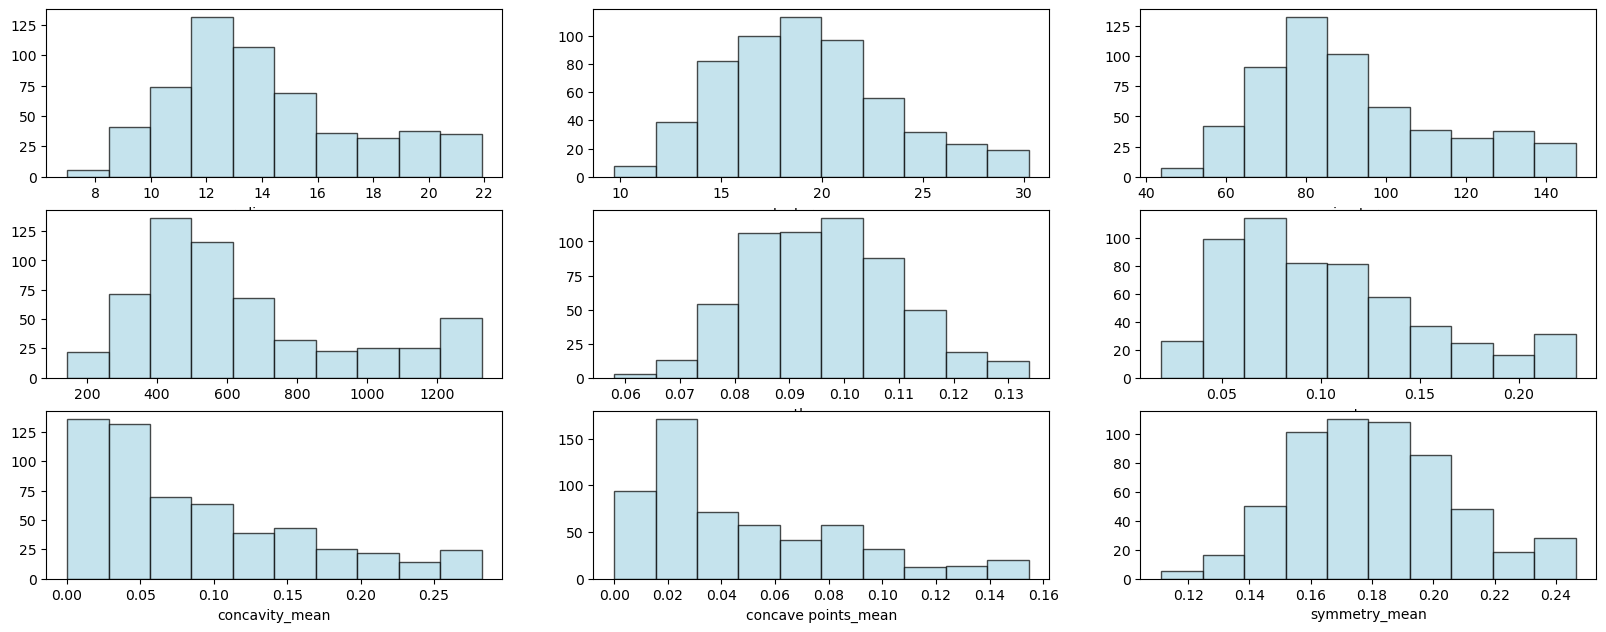

In [8]:
# 3. Check distributions and coorelations

# what kind of distributions do the features have?
# Binomial distrobutions

plt.figure(figsize= (20,10))
plt.subplot(4, 3, 1)
plt.hist(df['radius_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('radius_mean')

plt.subplot(4, 3, 2)
plt.hist(df['texture_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('texture_mean')

plt.subplot(4,3,3)
plt.hist(df['perimeter_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('perimeter_mean')

plt.subplot(4,3,4)
plt.hist(df['area_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('area_mean')

plt.subplot(4, 3, 5)
plt.hist(df['smoothness_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('smoothness_mean')

plt.subplot(4, 3, 6)
plt.hist(df['compactness_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('compactness_mean')

plt.subplot(4,3,7)
plt.hist(df['concavity_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('concavity_mean')

plt.subplot(4,3,8)
plt.hist(df['concave points_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('concave points_mean')

plt.subplot(4, 3, 9)
plt.hist(df['symmetry_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('symmetry_mean')

#plt.savefig('plots/i1.png')
plt.show()

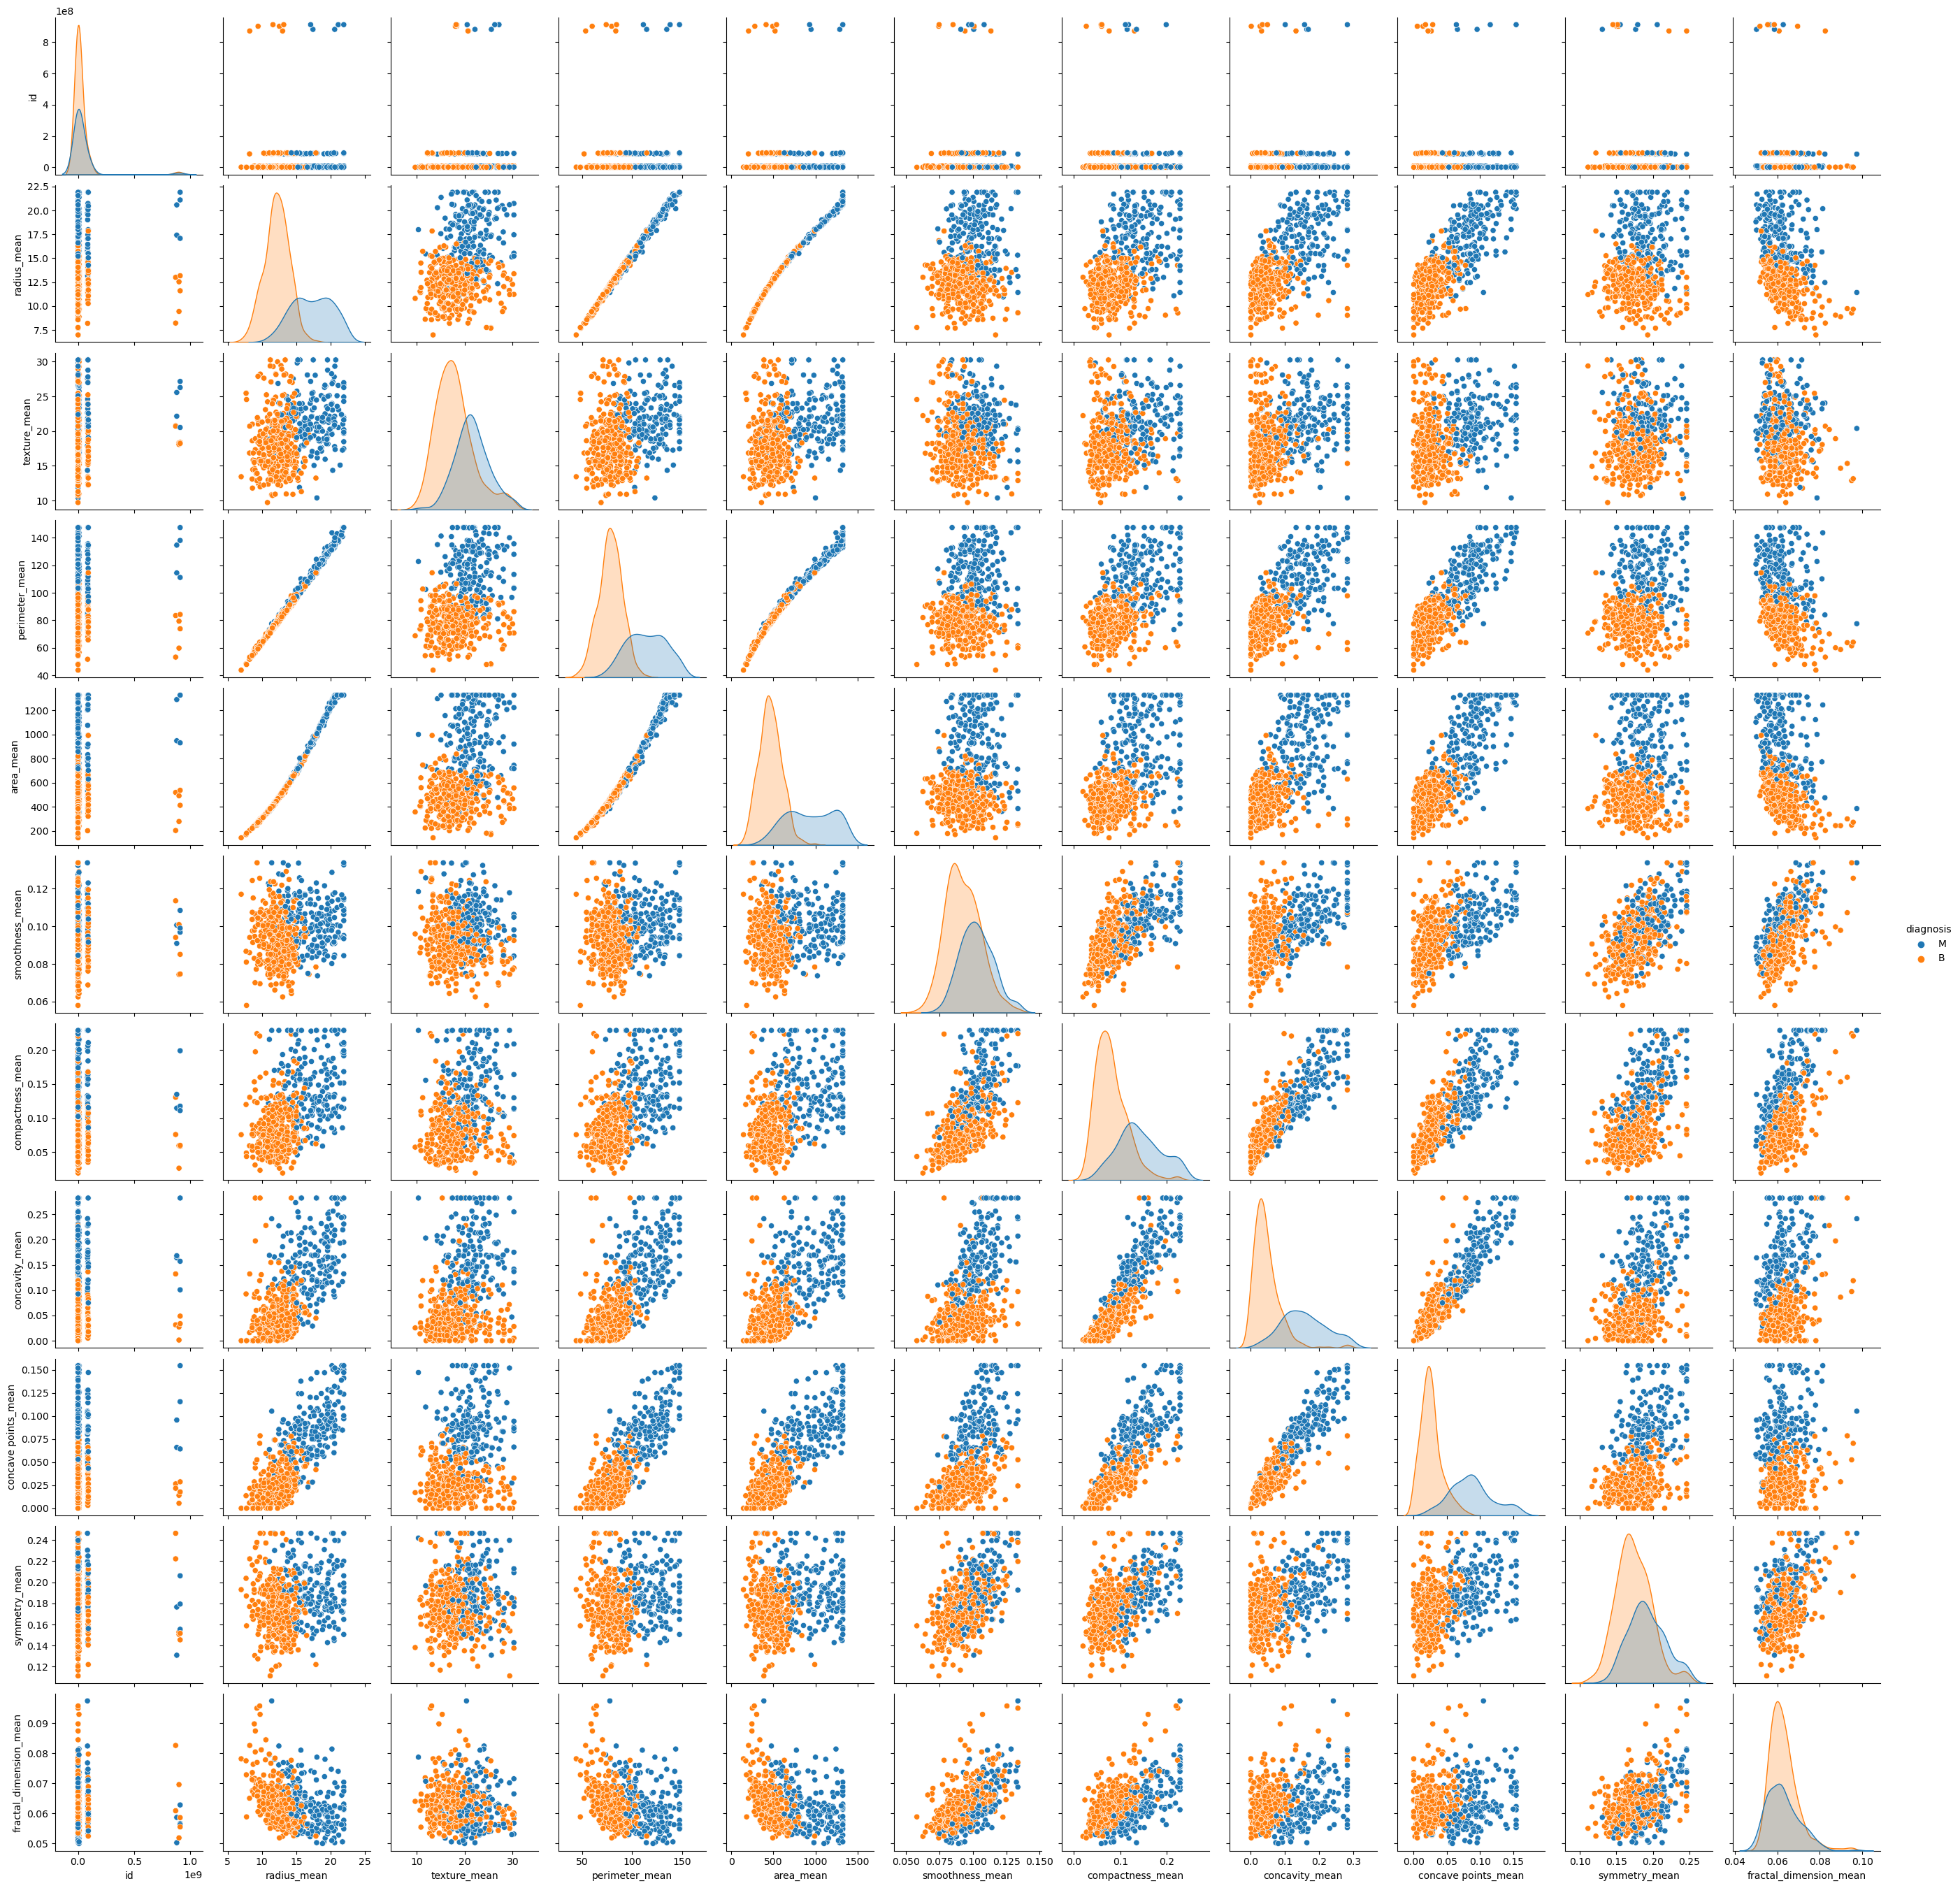

In [14]:
import seaborn as sns

# what kind of correlation does the data exhibit?
# There is a large positive coorelation between the concavity mean and diagnosis
# There is also a coorelation between compactness mean and diagnosis

sns.pairplot(df, hue='diagnosis')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()

In [15]:
df.corr()

/tmp/ipykernel_295/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id  radius_mean  texture_mean  perimeter_mean  \
id                      1.000000     0.060217      0.098836        0.057924   
radius_mean             0.060217     1.000000      0.332760        0.997692   
texture_mean            0.098836     0.332760      1.000000        0.339588   
perimeter_mean          0.057924     0.997692      0.339588        1.000000   
area_mean               0.066752     0.993891      0.341552        0.991861   
smoothness_mean        -0.012460     0.167672     -0.015997        0.204990   
compactness_mean        0.002794     0.502741      0.241666        0.553698   
concavity_mean          0.044852     0.674539      0.318654        0.714624   
concave points_mean     0.042831     0.811833      0.301509        0.841871   
symmetry_mean          -0.023848     0.146763      0.079586        0.181325   
fractal_dimension_mean -0.052511    -0.321139     -0.075117       -0.269567   

                        area_mean  smoothness_mean  compactness_mean  \
id                       0.066752        -0.012460          0.002794   
radius_mean              0.993891         0.167672          0.502741   
texture_mean             0.341552        -0.015997          0.241666   
perimeter_mean           0.991861         0.204990          0.553698   
area_mean                1.000000         0.167400          0.498665   
smoothness_mean          0.167400         1.000000          0.661938   
compactness_mean         0.498665         0.661938          1.000000   
concavity_mean           0.680126         0.526544          0.889882   
concave points_mean      0.814133         0.560961          0.832541   
symmetry_mean            0.155152         0.557597          0.588842   
fractal_dimension_mean  -0.303701         0.573977          0.558010   

                        concavity_mean  concave points_mean  symmetry_mean  \
id                            0.044852             0.042831      -0.023848   
radius_mean                   0.674539             0.811833       0.146763   
texture_mean                  0.318654             0.301509       0.079586   
perimeter_mean                0.714624             0.841871       0.181325   
area_mean                     0.680126             0.814133       0.155152   
smoothness_mean               0.526544             0.560961       0.557597   
compactness_mean              0.889882             0.832541       0.588842   
concavity_mean                1.000000             0.928382       0.489029   
concave points_mean           0.928382             1.000000       0.460386   
symmetry_mean                 0.489029             0.460386       1.000000   
fractal_dimension_mean        0.330482             0.169516       0.475904   

                        fractal_dimension_mean  
id                                   -0.052511  
radius_mean                          -0.321139  
texture_mean                         -0.075117  
perimeter_mean                       -0.269567  
area_mean                            -0.303701  
smoothness_mean                       0.573977  
compactness_mean                      0.558010  
concavity_mean                        0.330482  
concave points_mean                   0.169516  
symmetry_mean                         0.475904  
fractal_dimension_mean                1.000000

/tmp/ipykernel_295/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


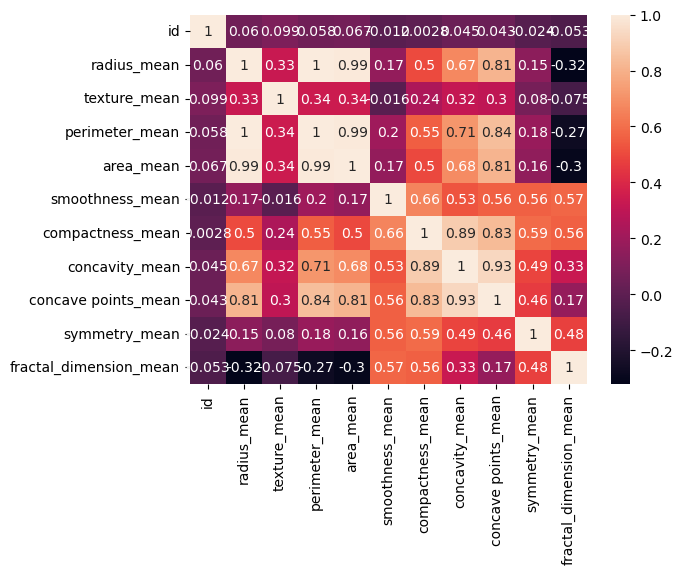

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# what kind of correlation does the data exhibit?
# There is a large positive coorelation between the concavity mean and diagnosis
# There is also a coorelation between compactness mean and diagnosis

# k Nearet Neighbor (kNN)

In [49]:
# import libraries
# define plot_decision_regions for later use

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

In [50]:
# 1. Arrange the data into featues and target arrays.

X = df.iloc[:,[7, 8]]
y = df.iloc[:,1]

print(X.shape)
print(y.shape)

(569, 2)
(569,)


In [51]:
# change y from categorical to numeric
# NOT NECCESARY
# y = pd.factorize(df[4])[0]
# print(y.shape)
# print(y)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [52]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [357 212]
Labels count in y_train: [250 148]
Labels count in y_test: [107  64]
(398, 2)
(171, 2)
     compactness_mean  concavity_mean
215           0.15170        0.099010
338           0.07326        0.025110
218           0.13060        0.127200
287           0.03729        0.022600
458           0.05073        0.012060
..                ...             ...
360           0.02650        0.001194
301           0.10140        0.068300
406           0.08501        0.055000
433           0.13890        0.159400
284           0.09580        0.111500

[398 rows x 2 columns]


In [78]:
# 3. Select the ML algorithm, and its parameteters

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#scaler = StandardScaler()

#X_train_std = scaler.fit_transform(X_train)

#X_test_std = scaler.transform(X_test)


scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, 
                           p=2, 
                           metric='minkowski')

#knn=KNeighborsClassifier(3)
#knn.fit(X_train_normal, y_train)
#y_pred_sklearn= knn.predict(X_test)
#print(y_pred_sklearn)

/tmp/ipykernel_295/2973991112.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipykernel_295/2973991112.py:45: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


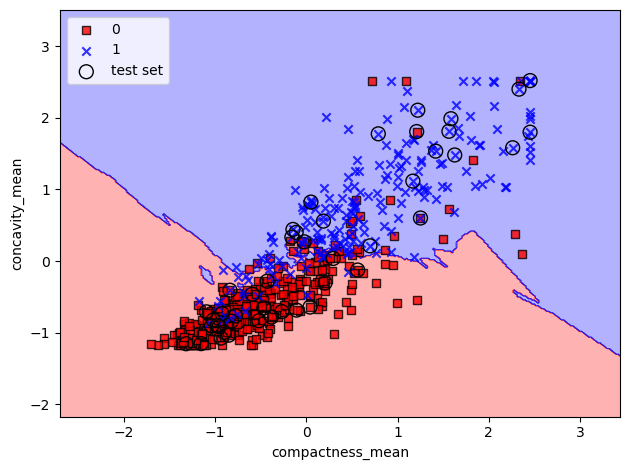

In [79]:
# 4. Build the model (.fit)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


#scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
#X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
#X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('compactness_mean')
plt.ylabel('concavity_mean')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [80]:
# 5. Apply the model to the test data (.predict)

from sklearn import metrics 
y_pred = knn.predict(X_test_std)

In [81]:
# 6. Estimate performance (accuracy score)

print(metrics.accuracy_score(y_test, y_pred))

0.8713450292397661


In [77]:
# What is the maximum accuracy you can achieve with the least amount of features? 
# 0.8713450292397661 with two features and a k of 7: 

# How does k affect accuracy?
# increasing k makes the model more robust in terms of acounting for outliers
# decreasing k makes the model overall less accurate in this case 
# I chose a k of 7 for this model